In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
customers = pd.read_csv(
    'D:\Coolyeah\Mata Kuliah\SMT 5\Analisis Visualisasi Data Teori\Pertemuan 10\customer-database-master\Ecommerce Customers.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


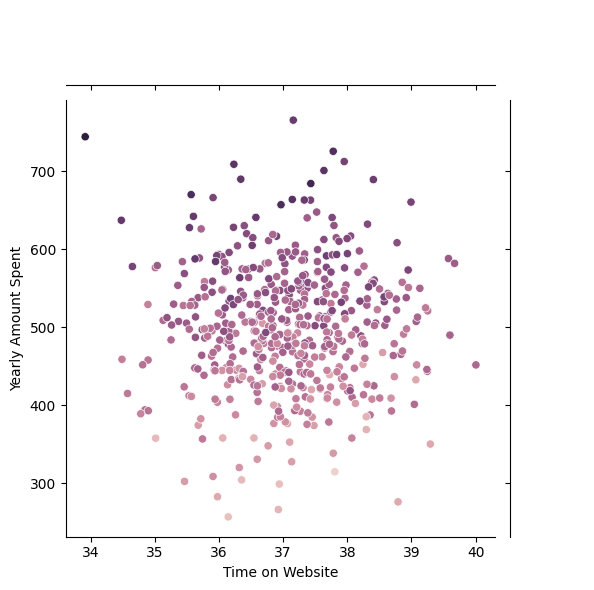

In [10]:
sns.jointplot(data=customers, x='Time on Website',
              y='Yearly Amount Spent', hue='Length of Membership', legend=False)

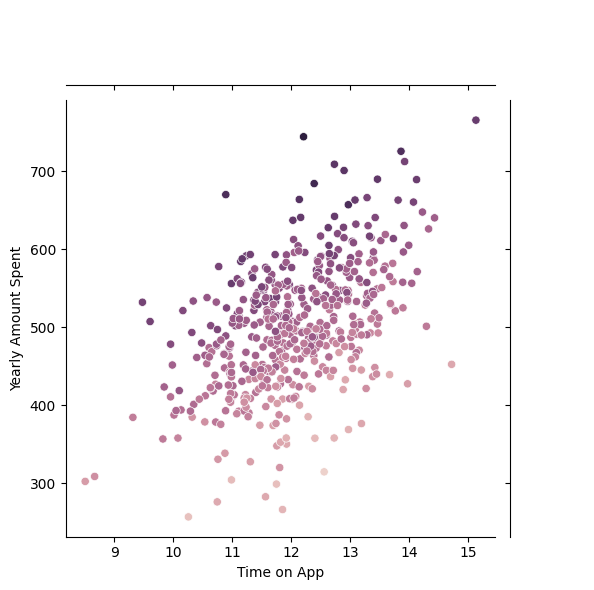

In [9]:
sns.jointplot(data=customers, x='Time on App',
              y='Yearly Amount Spent', hue='Length of Membership', legend=False)

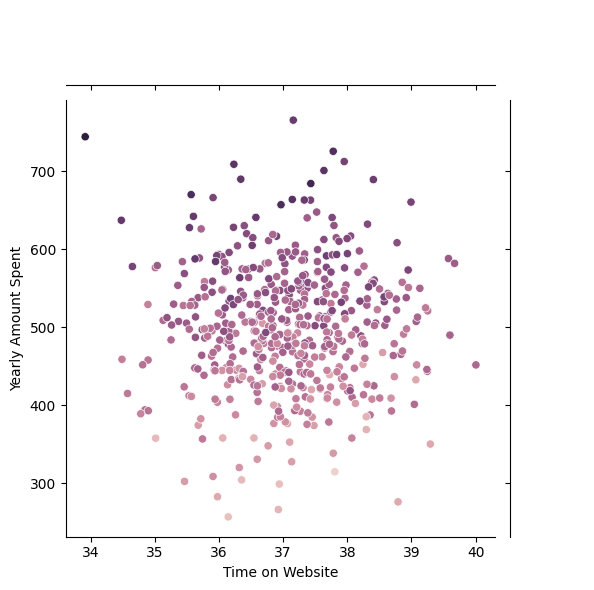

In [25]:
sns.jointplot(data=customers, x='Time on Website',
              y='Yearly Amount Spent', hue='Length of Membership', legend=False)

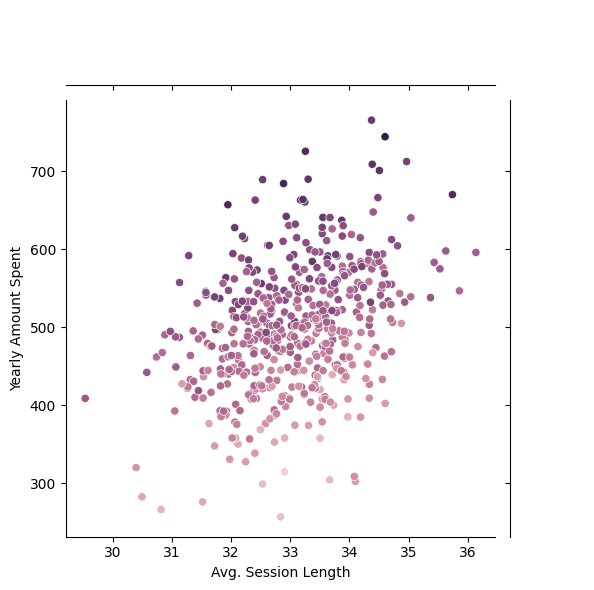

In [26]:
sns.jointplot(data=customers, x='Avg. Session Length',
              y='Yearly Amount Spent', hue='Length of Membership', legend=False)

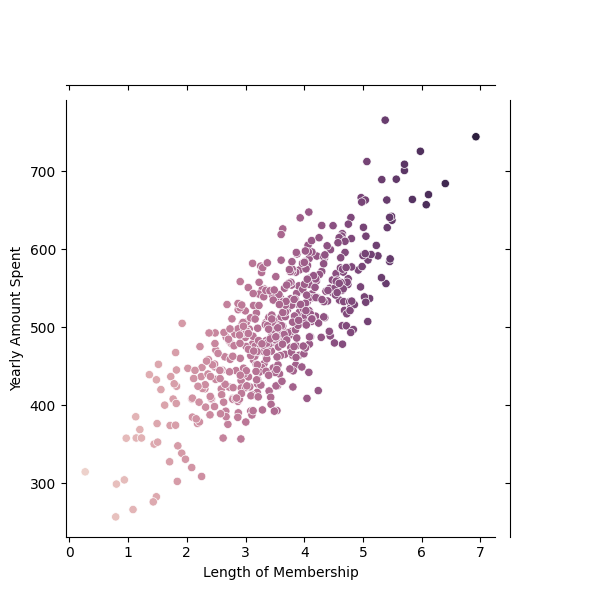

In [27]:
sns.jointplot(data=customers, x='Length of Membership',
              y='Yearly Amount Spent', hue='Length of Membership', legend=False)

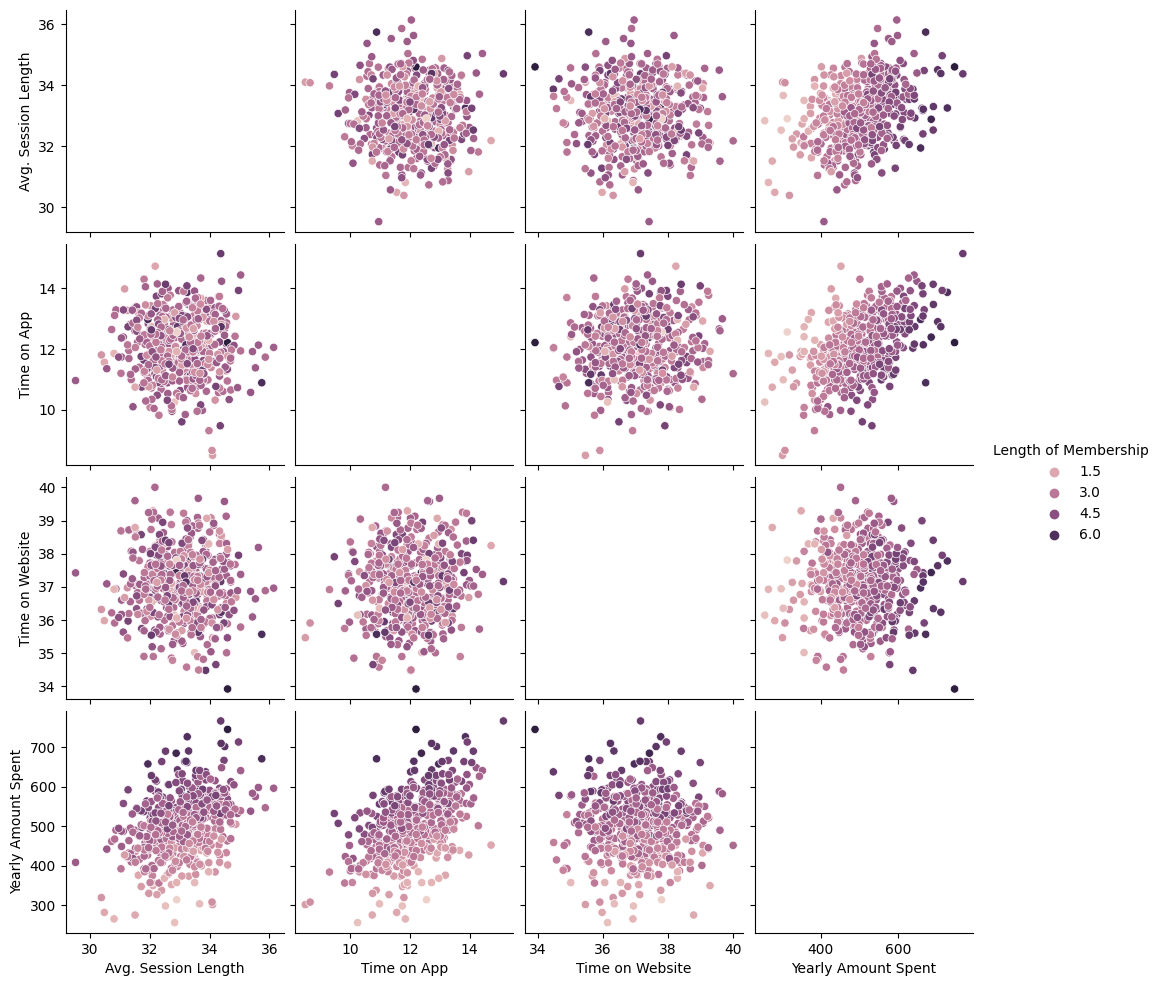

In [12]:
sns.pairplot(customers, hue='Length of Membership')

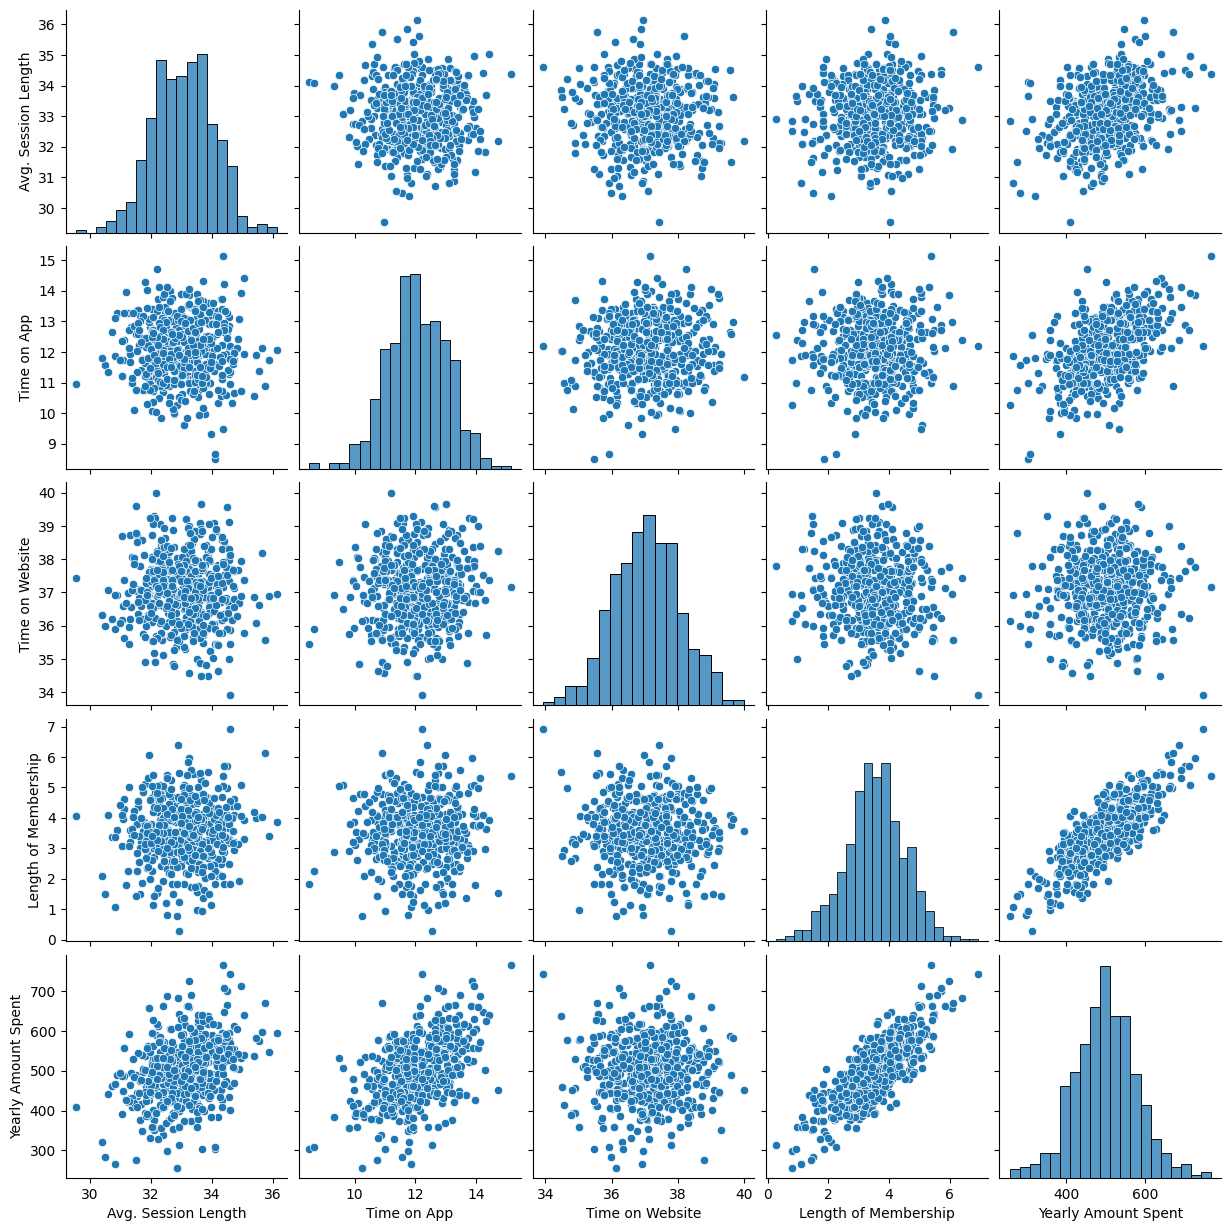

In [13]:
sns.pairplot(customers)

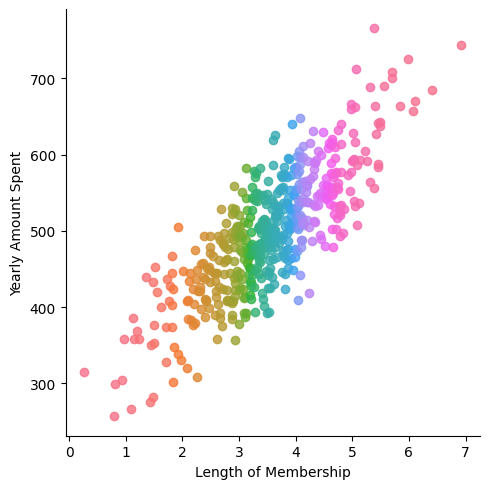

In [8]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',
           data=customers, hue='Length of Membership', legend=False)

In [15]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App',
               'Time on Website', 'Length of Membership']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Text(0, 0.5, 'Predicted Values')

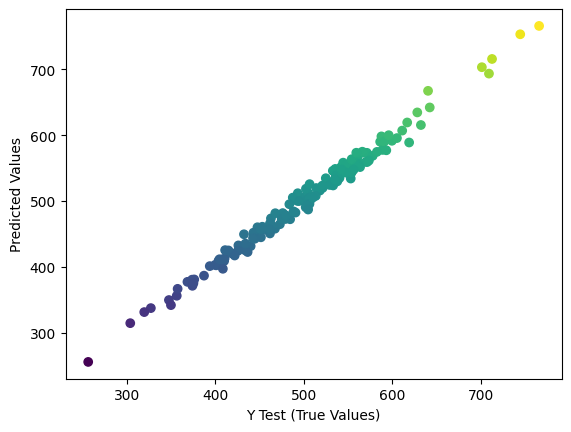

In [20]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions,
            c=predictions, cmap='viridis')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [16]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squarred Error :', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squarred Error :', np.sqrt(
    metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error : 7.228148653430811
Mean Squarred Error : 79.81305165097385
Root Mean Squarred Error : 8.9338150669786


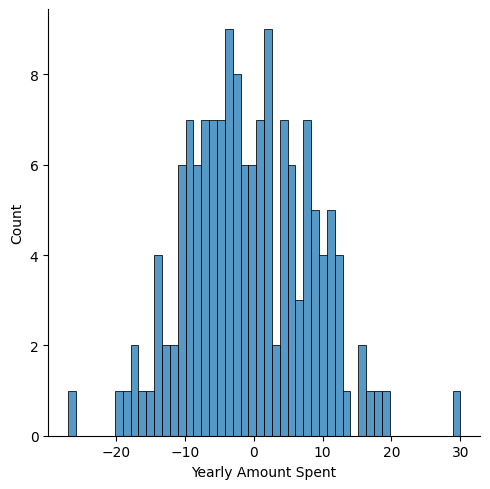

In [24]:
sns.displot(y_test-predictions, bins=50)

In [18]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(cdf)

                          Coeff
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097
